# Kde comparison with other libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from kdelearn.kde import Kde
from sklearn.neighbors import KernelDensity
import statsmodels.api as sm
from scipy.stats import gaussian_kde

In [2]:
def kdelearn_kde(x_train, x_test):
    bandwidth = np.array([1.0])
    Kde("gaussian").fit(x_train, bandwidth=bandwidth).pdf(x_test)

def sklearn_kde(x_train, x_test):
    KernelDensity(bandwidth=1.0, kernel="gaussian").fit(x_train).score_samples(x_test)

def statsmodels_kde(x_train, x_test):
    sm.nonparametric.KDEUnivariate(x_train[:, 0]).fit(kernel="gau", bw=1.0).evaluate(x_test[:, 0])

def scipy_kde(x_train, x_test):
    gaussian_kde(x_train.T, bw_method=1.).evaluate(x_test.T)


kde_funcs = [kdelearn_kde, sklearn_kde, statsmodels_kde, scipy_kde]

kdelearn_kde
sklearn_kde
statsmodels_kde
scipy_kde


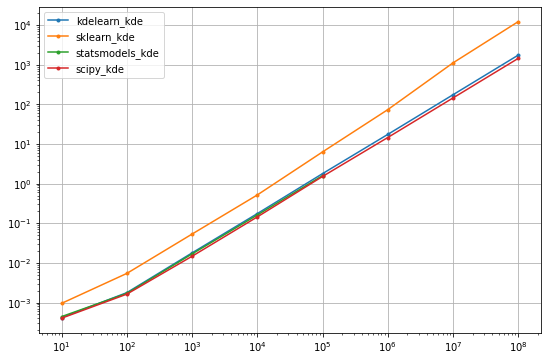

In [4]:
import time

m_test = 1000
x_test = np.linspace(-4, 4, m_test)[:, None]
repeats = 5  # 5

plt.figure(figsize=(9, 6))

for fun in kde_funcs:
    print(fun.__name__)
    avg_results = []
    m = []
    for m_train in [10 ** i for i in range(1, 9)]:  # 9
        
        if fun.__name__ == "statsmodels_kde" and m_train >= 10 ** 6:
            break
        
        x_train = np.random.normal(0, 1, size=(m_train, 1))
        results = []
        for _ in range(repeats):
            start_time = time.time()
            fun(x_train, x_test)
            elapsed_time = time.time() - start_time
            results.append(elapsed_time)
        avg_results.append(np.mean(results))
        m.append(m_train)

    plt.plot(m, avg_results, ".-", label=fun.__name__)

plt.xscale("log")
plt.yscale("log")
plt.legend()
plt.grid()
plt.show()

# KdeClassifier - performance

In [36]:
import time
import numpy as np
import matplotlib.pyplot as plt
from kdelearn.kde_funcs import KdeClassifier
from sklearn.naive_bayes import GaussianNB

## Time

In [37]:
models = [KdeClassifier, GaussianNB]

KdeClassifier
GaussianNB


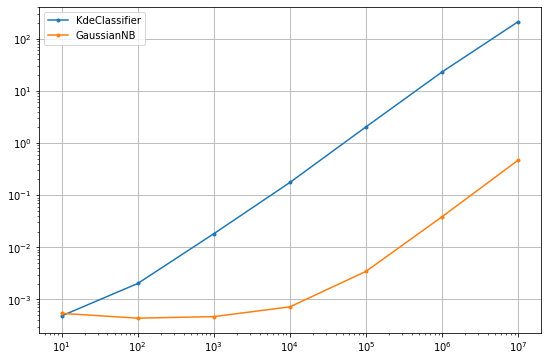

In [48]:
np.random.seed(0)

repeats = 5
m_test = 1000
n = 1
x_test = np.random.uniform(-1, 4, size=(m_test, 1))

plt.figure(figsize=(9, 6))

for Model in models:
    print(Model.__name__)

    avg_results = []
    m = [10 ** i for i in range(1, 8)]
    for m_train in m:
        results = []
        for _ in range(repeats):
            x_train1 = np.random.normal(0, 1, size=(m_train // 2, n))
            labels_train1 = np.full(m_train // 2, 1)
            x_train2 = np.random.normal(3, 1, size=(m_train // 2, n))
            labels_train2 = np.full(m_train // 2, 2)
            x_train = np.concatenate((x_train1, x_train2))
            labels_train = np.concatenate((labels_train1, labels_train2))

            start_time = time.time()
            model = Model().fit(x_train, labels_train)
            labels_pred = model.predict(x_test)
            elapsed_time = time.time() - start_time
            results.append(elapsed_time)
        avg_results.append(np.mean(results))

    plt.plot(m, avg_results, ".-", label=Model.__name__)

plt.xscale("log")
plt.yscale("log")
plt.legend()
plt.grid()
plt.show()

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from kdelearn.kde import Kde
from kdelearn.kde_funcs import kde_outliers, KdeClassifier

# KDE

In [2]:
np.random.seed(0)

m_train = 100_000
n = 1
x_train = np.random.normal(0, 1, size=(m_train, n))
bandwidth = np.array([0.10564113])
# weights_train = np.full(m_train, 1.5)
weights_train = None

m_test = 1000
x_test = np.linspace(-4, 4, m_test)[:, None]

## gaussian

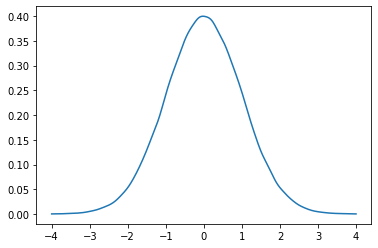

In [3]:
kde = Kde("gaussian").fit(x_train, weights_train)
scores = kde.pdf(x_test)

plt.plot(x_test, scores)
plt.show()

# (100_000 x 1_000) 0m 2s
# (1_000_000 x 1_000) 0m 22s
# (10_000_000 x 1_000) 3m 19s

## uniform

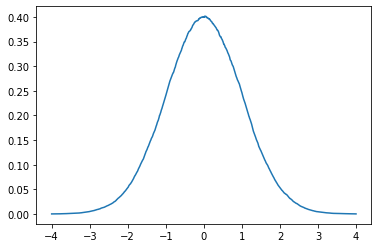

In [4]:
kde = Kde("uniform").fit(x_train, weights_train)
scores = kde.pdf(x_test)

plt.plot(x_test, scores)
plt.show()

## epanechnikov

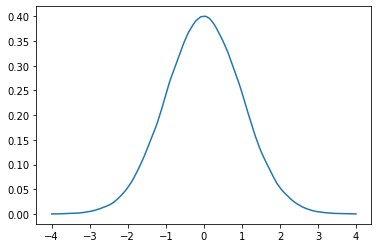

In [5]:
kde = Kde("epanechnikov").fit(x_train, weights_train)
scores = kde.pdf(x_test)

plt.plot(x_test, scores)
plt.show()

## cauchy

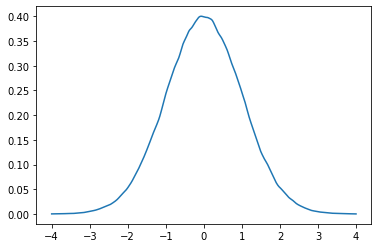

In [6]:
kde = Kde("cauchy").fit(x_train, weights_train)
scores = kde.pdf(x_test)

plt.plot(x_test, scores)
plt.show()